<a href="https://colab.research.google.com/github/majdmibrahim/FaceDetection/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project :-
### The objective of this project is to classify whether someone has diabetes or not.
### Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)

# About the Dataset
### Pregnancies :- Number of times a woman has been pregnant
### Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
### BloodPressure :- Diastollic Blood Pressure (mm hg)
### SkinThickness :- Triceps skin fold thickness(mm)
### Insulin :- 2 hour serum insulin(mu U/ml)
### BMI :- Body Mass Index ((weight in kg/height in m)^2)
### Age :- Age(years)
### DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
### Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

In [418]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSamplerf
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [419]:
# Loading Data
data=pd.read_csv('diabetes.csv')

## Explore Data

In [420]:
#data.head()
#data.tail()
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
600,1,108,88,19,0,27.1,0.400,24,0
675,6,195,70,0,0,30.9,0.328,31,1
176,6,85,78,0,0,31.2,0.382,42,0


In [421]:
data.shape

(768, 9)

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [423]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [424]:
data.duplicated().sum()

np.int64(0)

In [425]:
#Finding Missing Values in Data
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


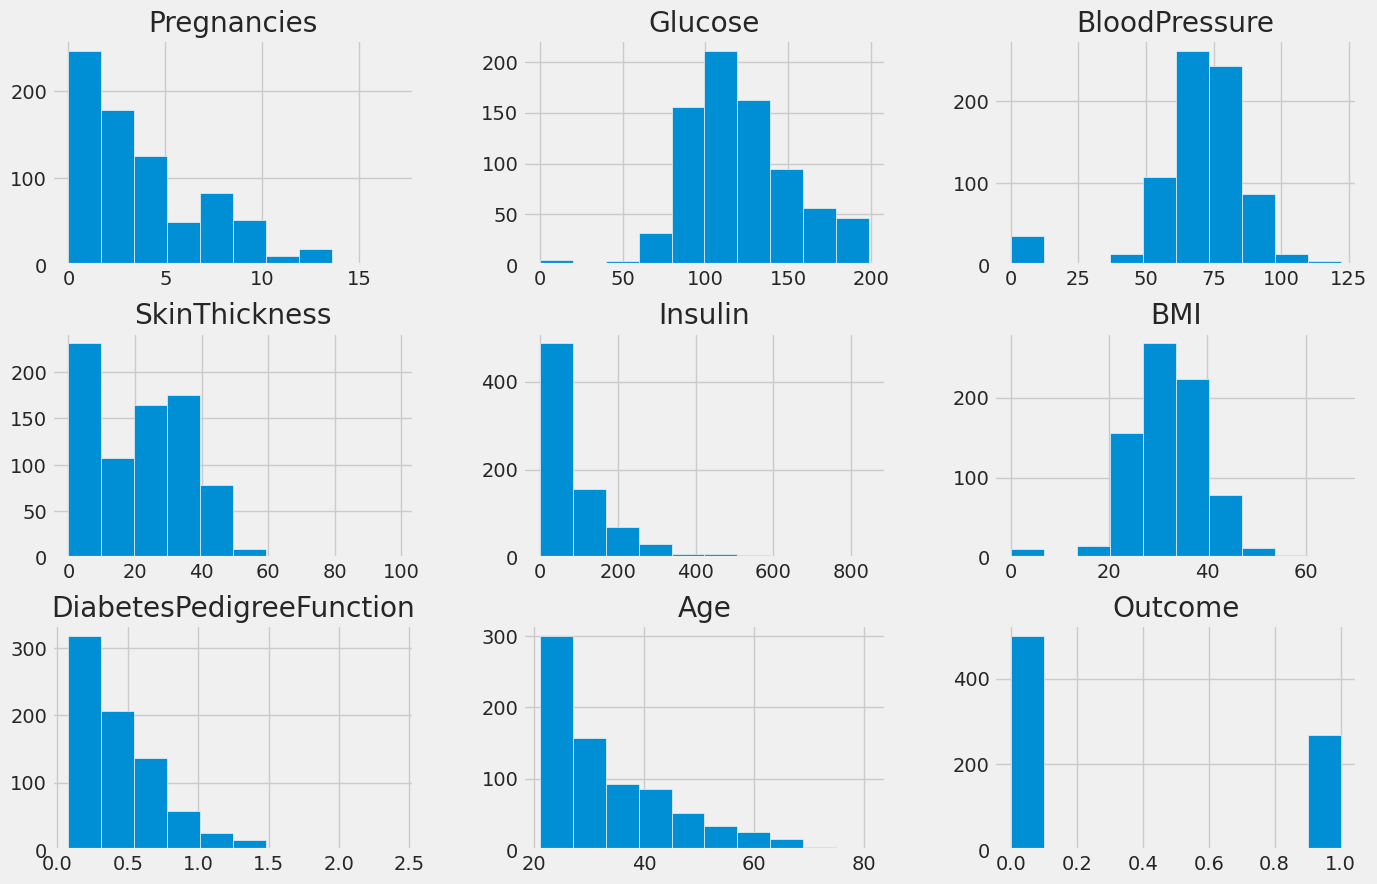

In [426]:
# Understanding the Shape and Distribution of Data to Complete the Missing Data
data.hist(bins=10,figsize=(15,10))
plt.show()

In [427]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

# Analysis

In [428]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

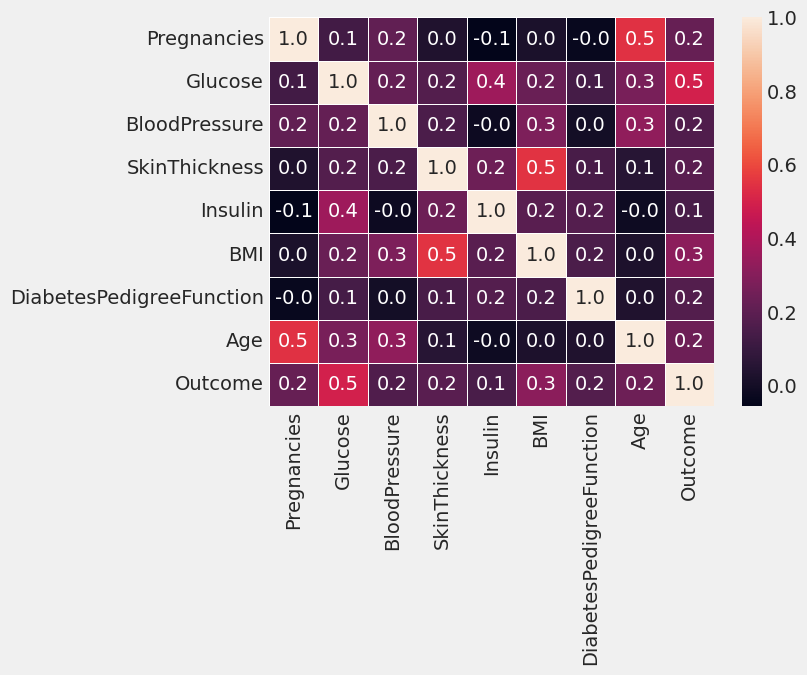

In [429]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f')

### Feature Selecting

In [430]:
data=data.drop('Insulin',axis=1)

### Exploring Data Balance

<Axes: xlabel='Outcome', ylabel='count'>

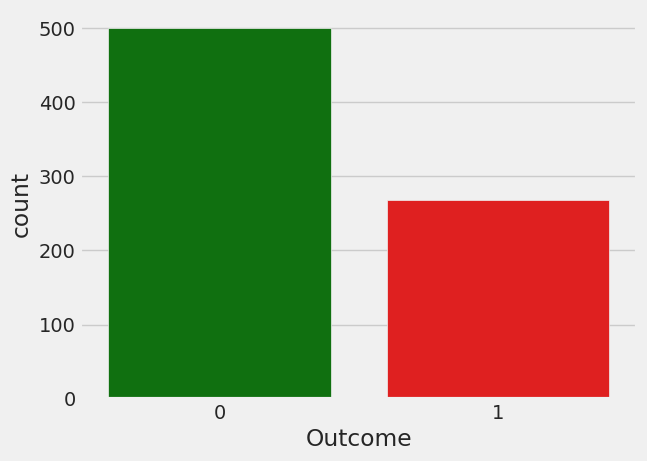

In [431]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])



In [432]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape  ,mini.shape
268/(500+268)

0.3489583333333333

### Exploring Outliers Data

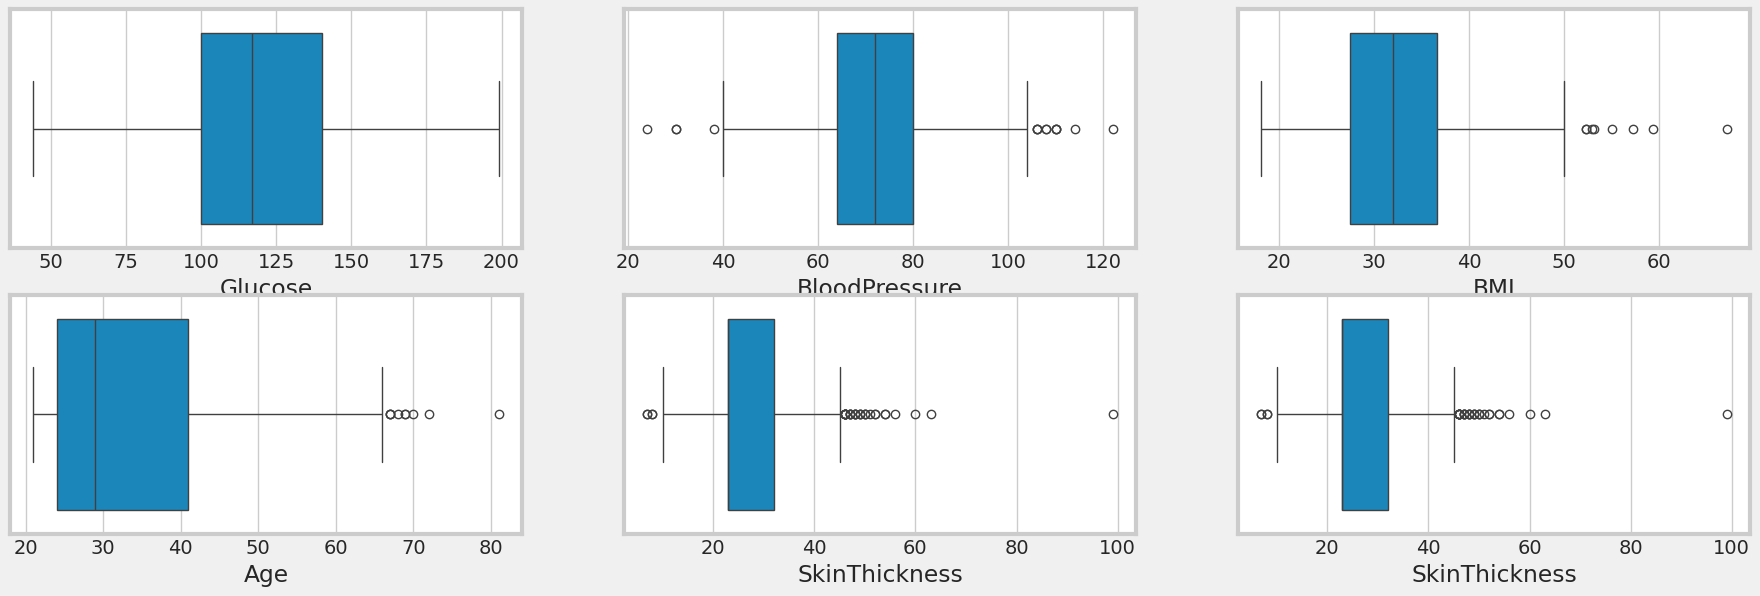

In [433]:
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,6)
plt.show()


# Create Model

In [434]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']


In [435]:
models = [
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500),
    GradientBoostingClassifier(n_estimators=1000),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]

model_names = [
    'LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier',
    'KNeighborsClassifier','GaussianNB','DecisionTreeClassifier'
]


# Function to calculate metrics

In [436]:
def evaluate_model(x_train, x_test, y_train, y_test, models, model_names):
    results = {'Algorisms': [], 'Accuracies': [], 'Recal': [], 'precision': [], 'F1_Score': []}
    for model, name in zip(models, model_names):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        results['Algorisms'].append(name)
        results['Accuracies'].append(accuracy_score(y_test, y_pred))
        results['Recal'].append(recall_score(y_test, y_pred))
        results['precision'].append(precision_score(y_test, y_pred))
        results['F1_Score'].append(f1_score(y_test, y_pred))

    return pd.DataFrame(results)

# Function to draw Confusion Matrix

In [437]:
def plot_confusion_matrices(x_train, x_test, y_train, y_test, models, model_names, title_prefix=""):
  for model, name in zip(models, model_names):
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      cm = confusion_matrix(y_test, y_pred)

      plt.figure(figsize=(4,3))
      sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                  xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
      plt.title(f"{title_prefix} Confusion Matrix - {name}")
      plt.ylabel("True label")
      plt.xlabel("Predicted label")
      plt.show()

# Pre-balance evaluation

In [439]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41, shuffle=True)
results_before = evaluate_model(x_train, x_test, y_train, y_test, models, model_names)
results_before.index.name = 'Index'
print("=== Results BEFORE Oversampling ===")
print(results_before)

=== Results BEFORE Oversampling ===
                        Algorisms  Accuracies     Recal  precision  F1_Score
Index                                                                       
0              LogisticRegression    0.766234  0.545455   0.731707  0.625000
1                             SVC    0.779221  0.545455   0.769231  0.638298
2          RandomForestClassifier    0.798701  0.654545   0.750000  0.699029
3      GradientBoostingClassifier    0.759740  0.690909   0.655172  0.672566
4            KNeighborsClassifier    0.772727  0.654545   0.692308  0.672897
5                      GaussianNB    0.714286  0.581818   0.603774  0.592593
6          DecisionTreeClassifier    0.727273  0.709091   0.600000  0.650000


# Confusion Matrices before balance

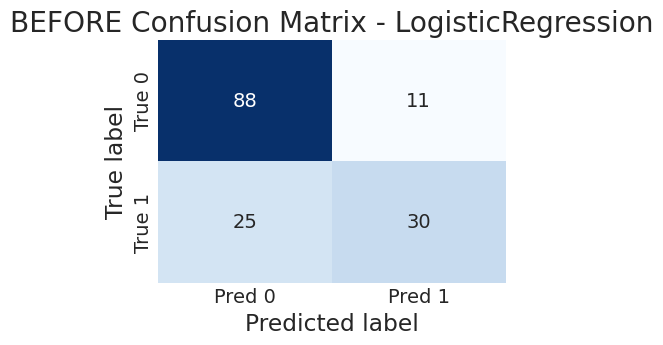

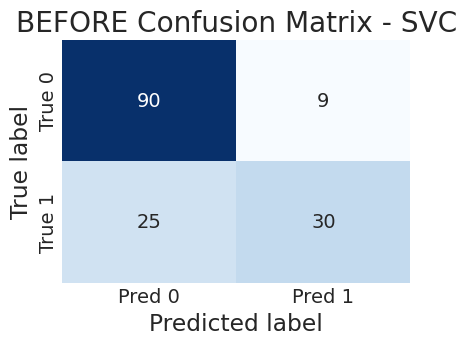

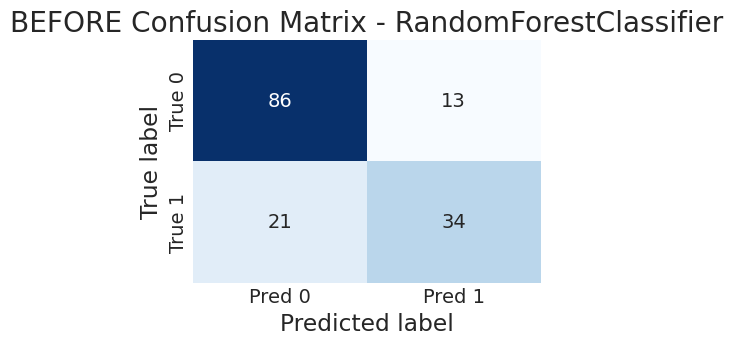

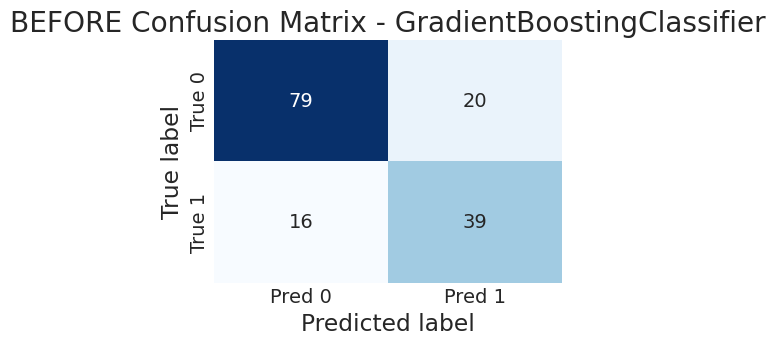

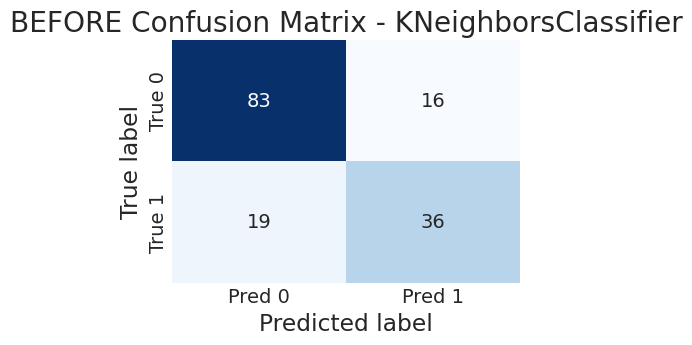

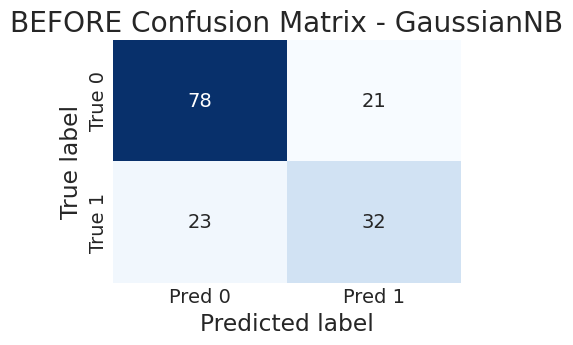

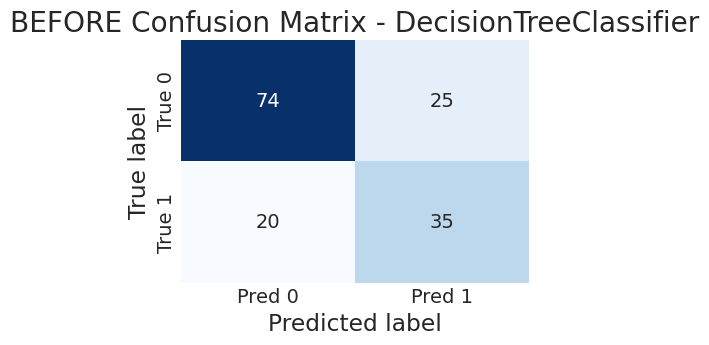

In [440]:
plot_confusion_matrices(x_train, x_test, y_train, y_test, models, model_names, title_prefix="BEFORE")

# Post-balance evaluation

In [442]:
rm = RandomOverSampler(random_state=41)
X_res, y_res = rm.fit_resample(x, y)
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=41, shuffle=True)
results_after = evaluate_model(x_train_res, x_test_res, y_train_res, y_test_res, models, model_names)
results_after.index.name = 'Index'
print("\n=== Results AFTER Oversampling ===")
print(results_after)


=== Results AFTER Oversampling ===
                        Algorisms  Accuracies     Recal  precision  F1_Score
Index                                                                       
0              LogisticRegression       0.735  0.688679   0.784946  0.733668
1                             SVC       0.715  0.707547   0.742574  0.724638
2          RandomForestClassifier       0.885  0.943396   0.854701  0.896861
3      GradientBoostingClassifier       0.865  0.905660   0.849558  0.876712
4            KNeighborsClassifier       0.775  0.801887   0.779817  0.790698
5                      GaussianNB       0.725  0.669811   0.780220  0.720812
6          DecisionTreeClassifier       0.815  0.886792   0.789916  0.835556


# Confusion Matrices after equilibrium

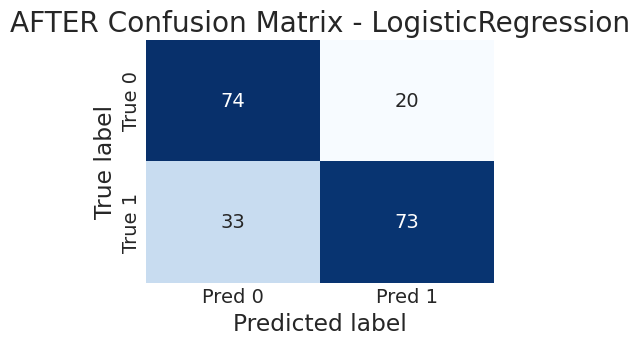

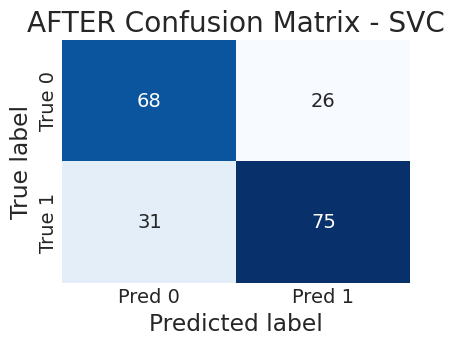

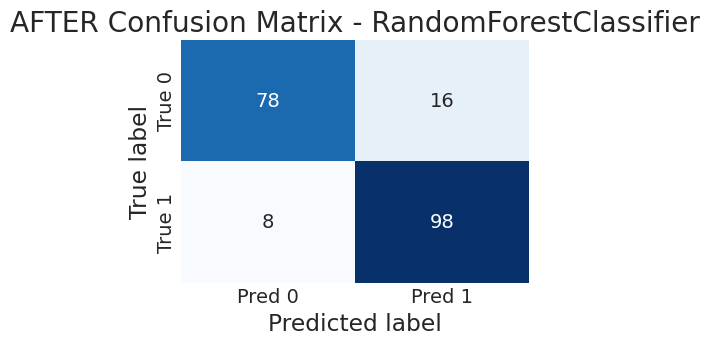

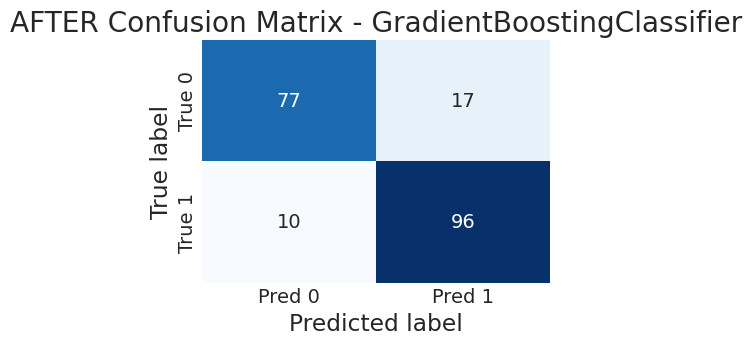

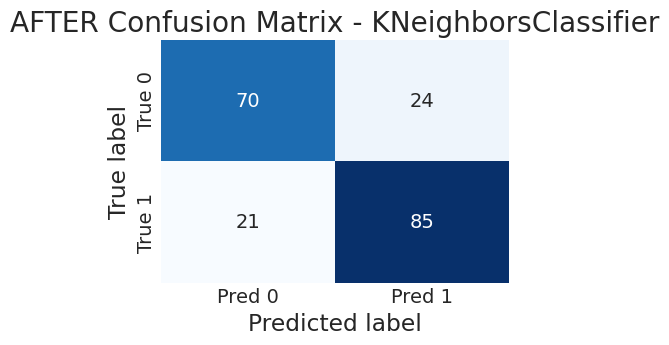

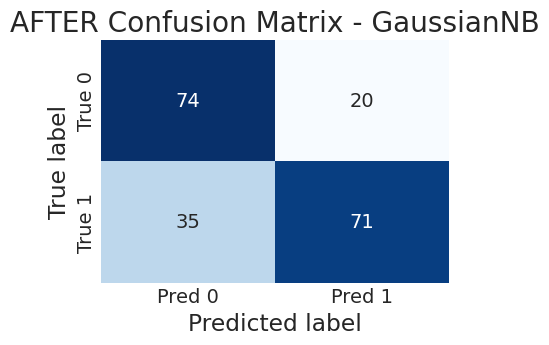

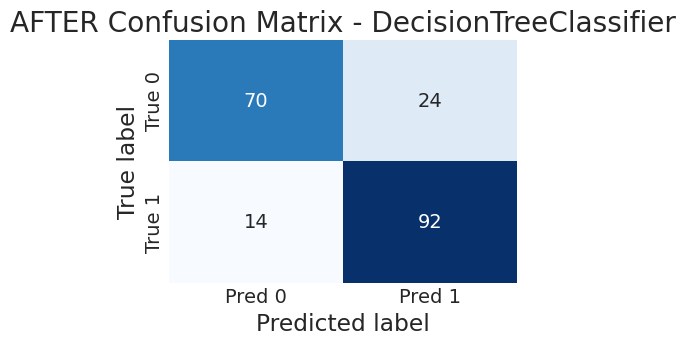

In [443]:
plot_confusion_matrices(x_train_res, x_test_res, y_train_res, y_test_res, models, model_names, title_prefix="AFTER")

# Impact of Oversampling on Model Performance in Diabetes Prediction

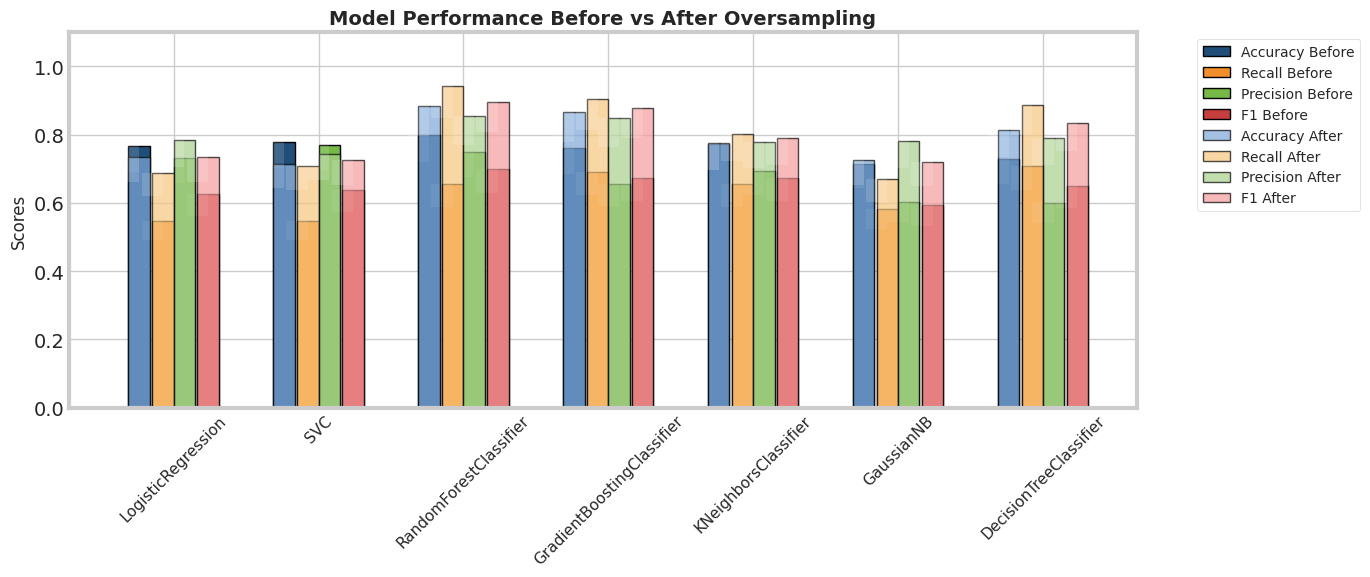

In [444]:
# Model names
model_names = results_before['Algorisms']
n_models = len(model_names)

# Bar settings
bar_width = 0.18
intra_margin = 0.02  # space between bars in the same set
group_gap = 0.5      # space between model groups

# Base positions for each group
x_base = np.arange(n_models) * (4*bar_width + group_gap)

# Positions for each metric
x_acc = x_base - 1.5*bar_width - intra_margin
x_rec = x_base - 0.5*bar_width
x_prec = x_base + 0.5*bar_width
x_f1 = x_base + 1.5*bar_width + intra_margin

# Updated LinkedIn-friendly colors
colors_before = ['#1f4e79', '#f28e2b', '#76b947', '#c73e3e']  # darker, professional shades
colors_after  = ['#7ea7d8', '#f7c77f', '#a8d18d', '#f49c9c']  # lighter shades for "after"


fig, ax = plt.subplots(figsize=(14,6))

# Function to add values on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

# Helper to draw bars with subtle 3D effect
def bar_3d(x, heights, width, color, alpha=1.0, label=None):
    bars = ax.bar(x, heights, width, color=color, alpha=alpha,
                  edgecolor='black', linewidth=1, label=label)
    # Slight lighter overlay for top highlight
    for bar in bars:
        bar_height = bar.get_height()
        ax.bar(bar.get_x(), bar_height*0.1, width, bottom=bar_height*0.9,
               color='white', alpha=0.15, edgecolor='none')
    return bars

# Bars before oversampling
bars_acc_before = bar_3d(x_acc, results_before['Accuracies'], bar_width, colors_before[0], label='Accuracy Before')
bars_rec_before = bar_3d(x_rec, results_before['Recal'], bar_width, colors_before[1], label='Recall Before')
bars_prec_before = bar_3d(x_prec, results_before['precision'], bar_width, colors_before[2], label='Precision Before')
bars_f1_before = bar_3d(x_f1, results_before['F1_Score'], bar_width, colors_before[3], label='F1 Before')

# Bars after oversampling
bars_acc_after = bar_3d(x_acc, results_after['Accuracies'], bar_width, colors_after[0], alpha=0.7, label='Accuracy After')
bars_rec_after = bar_3d(x_rec, results_after['Recal'], bar_width, colors_after[1], alpha=0.7, label='Recall After')
bars_prec_after = bar_3d(x_prec, results_after['precision'], bar_width, colors_after[2], alpha=0.7, label='Precision After')
bars_f1_after = bar_3d(x_f1, results_after['F1_Score'], bar_width, colors_after[3], alpha=0.7, label='F1 After')

# # Add numeric values
# for bars in [bars_acc_before, bars_rec_before, bars_prec_before, bars_f1_before,
#              bars_acc_after, bars_rec_after, bars_prec_after, bars_f1_after]:
#     add_values(bars)

# Axes and labels
ax.set_xticks(x_base)
ax.set_xticklabels(model_names, rotation=45, fontsize=11)
ax.set_ylim(0, 1.10)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance Before vs After Oversampling', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
